In [1]:
import matplotlib.pyplot as plt
import numpy as np
import teneva


from ttopt import TTOpt
from ttopt import ttopt_init

np.random.seed(16333)

In [3]:
d = 10
p = 2
q = 25
evals = 1.E+5
rmax = 4
reps = 10
fs_opt_list = [None, 0.001, 0.01, 0.1, 1., 10., 100, 1000.]
e_list = {}

In [4]:
for func in teneva.func_demo_all(d=d):
    lim = func.b[0] - func.a[0]
    e_list[func.name] = []
    for fs_opt in fs_opt_list:
        e = []
        for i in range(reps):
            name = func.name + ' ' * (15 - len(func.name))
            
            tto = TTOpt(f=func.get_f_poi, d=func.d, a=func.a, b=func.b,
                name=name, x_min_real=func.x_min, y_min_real=func.y_min,
                p=p, q=q, evals=evals)
            
            tto.minimize(rmax=rmax, fs_opt=fs_opt or None)
            e.append(tto.e_y)
            
            print(tto.info(with_e_x=False) + f' | {lim:-6.2f} | opt = {fs_opt}')
        
        e_list[func.name].append(np.mean(e))
        
        print('')
    
    print('\n')

Ackley         -10d | k=1.00e+05 | t_all=1.34e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.29e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.31e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.39e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.45e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.36e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.32e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.34e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.33e+00 | e_y=3.91e-06  |  65.54 | opt = None
Ackley         -10d | k=1.00e+05 | t_all=1.29e+00 | e_y=3.91e-06  |  65.54 | opt = None

Ackley         -10d | k=1.00e+05 | t_all=1.24e+00 | e_y=3.91e-06  |  65.54 | opt = 0.001
Ackley         -10d | k=1.00e+

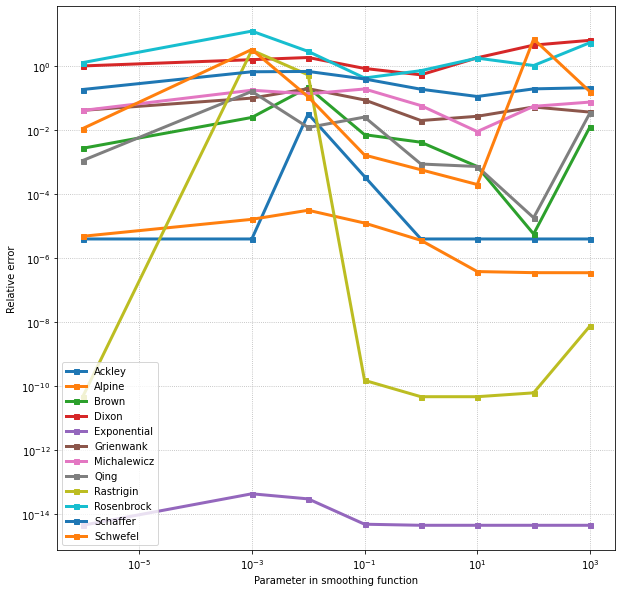

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.subplots_adjust(wspace=0.3)

ax.set_xlabel('Parameter in smoothing function')
ax.set_ylabel('Relative error')
    
for name, res in e_list.items():
    ax.plot([0.000001] + fs_opt_list[1:], res, label=name, marker='s', markersize=5, linewidth=3)
    
ax.semilogx()
ax.semilogy()
ax.legend(loc='best', frameon=True)
ax.grid(ls=":")

plt.show()